**1. FREE FOR ALL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import uniform
from numpy import linalg


# Definimos las clases que usaremos.

class poblacion:


  def __init__(self, x, y, vx, vy, r, S, E, C):

    # nombramos los estados de las personas
    
    self.sanos = S
    self.enfermos = E
    self.recuperados = C

    # sus posiciones
    
    self.X = x
    self.Y = y

    # sus velocidades
    self.VX = vx
    self.VY = vy

    # el radio 
    self.R = r

 #  definimos la evolución en su posicion
    
  def posicion(self, dt):
    
    self.X = self.X + self.VX*dt
    self.Y = self.Y + self.VY*dt

 # definimos las colisiones
    
  def colision(self,Vr,distance):
    

    choque = 2*self.R - distance     

    self.VX = uniform(-2,2)
      
    self.X = self.X + choque*Vr[0]

    self.VY = random.choice([-1,1])*np.sqrt((2)**(2) - self.VX**(2))

    self.Y = self.Y + choque*Vr[1]
    


  # definimos la colisión con las paredes
    
  def walls(self, w):

    
    if (w == 1):                          # definimos una de las paredes, izquierda
      
      choque = -self.X + self.R          
      
      self.VX = self.VX - 2*self.VX       # cambio en la velocidad por el choque
      
      self.X = self.X + choque           # cambio en la posición por el choque
      
      
    if (w == 2):                          #derecha
      
      choque = l -self.X - self.R
      self.VX = self.VX - 2*self.VX
      self.X = self.X + choque
      
    if (w == 3):                          #arriba
      
      choque = l -self.Y - self.R
      self.VY = self.VY - 2*self.VY
      self.Y = self.Y + choque
      
    if (w == 4):                          #abajo
      
      choque = -self.Y + self.R
      self.VY = self.VY - 2*self.VY
      self.Y = self.Y + choque
      

  # definimos la función para enfermar a las personas
  
  def test_enfermedad(self):

    if (self.recuperados != True):
                
      self.enfermos = True
      self.sanos = False
      
  # definimos la función de cuarentena
  
  def test_recuperacion(self,cont):

    if (self.enfermos == True ):

      
      cont = cont + dt
      
      if (cont >= 15 ):
        
        self.recuperados = True
        self.enfermos = False

    return cont


# definimos condiciones iniciales

n = 200    # número de personas
dt = 0.1   # aumento temporal
l = np.sqrt(n) # tamaño de la caja  
r = 0.1        # radio
T = np.arange(0,50,dt)  # Tiempo 


personas= []                       # lista vacía para agregar a las personas


for i in range(n):

  vx = uniform(-2,2)         
  vy = random.choice([-1,1])*np.sqrt(2**(2) - vx**(2))

    
  if (i == 0):                  # para una persona enferma

    persona = poblacion(uniform(0,l),uniform(0,l), vx, vy, r, False, True, False)
    personas.append(persona)
    
  else:

    persona = poblacion(uniform(0,l),uniform(0,l), vx, vy, r, True, False, False)
    personas.append(persona)
    
cont= np.zeros(n)

data = np.zeros((len(T),3))


# Simulacion

for k in range(len(T)):     # Loop para el tiempo
  
  for i in range(n):          # para cada persona

    for j in range(n):        # para la interacción entre personas
      
      if (i != j):
        
        VR = [personas[i].X - personas[j].X, personas[i].Y - personas[j].Y]
        distance = linalg.norm(VR)

        if distance <= (personas[i].R + personas[j].R ) :    # Colisión entre personas

          if (personas[i].enfermos == True):                    # Infección 

            personas[j].test_enfermedad()
            
          Vr = VR/(linalg.norm(VR))
          
          personas[i].colision(Vr,distance)
           
    if (personas[i].X  - personas[i].R <= 0   ):     # colisión con las paredes
  
      personas[i].walls(1)
  
    if (personas[i].X + personas[i].R >= l ):
  
      personas[i].walls(2)
  

    if (personas[i].Y + personas[i].R >= l ):
  
      personas[i].walls(3)
  

    if (personas[i].Y - personas[i].R <= 0 ):
  
      personas[i].walls(4)

        
    cont[i] = personas[i].test_recuperacion(cont[i])    # Conteo del tiempo que le toma a una persona recuperarse
      
    personas[i].posicion(dt)       #  cambio de posición

    # Datos
    
    if (personas[i].sanos == True):
      
      data[k,0] = data[k,0] +1
      
    elif (personas[i].enfermos == True):
      
      data[k,1] = data[k,1] +1
  

    elif (personas[i].recuperados == True):
      

      data[k,2] = data[k,2] +1



datos = np.column_stack((data, T))

np.savetxt("Data.txt",datos, fmt='%s')

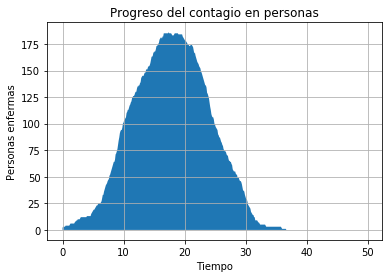

In [2]:
x, y, z, t =np.loadtxt('Data.txt',unpack=True)
plt.fill_between(t,y)
plt.xlabel('Tiempo')
plt.ylabel('Personas enfermas')
plt.grid()
plt.title('Progreso del contagio en personas')
plt.show()

**2. SOCIAL DISTANCING**

In [3]:
class poblacion:


  def __init__(self, x, y, vx, vy, r, S, E, C):

    # nombramos los estados de las personas
    
    self.sanos = S
    self.enfermos = E
    self.recuperados = C

    # sus posiciones
    
    self.X = x
    self.Y = y

    # sus velocidades
    self.VX = vx
    self.VY = vy

    # el radio 
    self.R = r

 #  definimos la evolución en su posicion
    
  def posicion(self, dt):
    
    self.X = self.X + self.VX*dt
    self.Y = self.Y + self.VY*dt

 # definimos las colisiones
    
  def colision(self,Vr,distance):
    
    
    choque = 2*self.R - distance     

    self.X = self.X + choque*Vr[0]

    self.Y = self.Y + choque*Vr[1]
    
    self.VX = uniform(-2,2)
    self.VY = random.choice([-1,1])*np.sqrt((2)**(2) - self.VX**(2))
    if self.VX == 0 and self.VY == 0:  #condición para que las partículas que inicien con velocidad cero, la mantengan
        self.VX = self.VX
        self.VY = self.VY
        
    
    
     


  # definimos la colisión con las paredes
    
  def walls(self, w):

    
    if (w == 1):                          # definimos una de las paredes, izquierda
      
      choque = -self.X + self.R          
      
      self.VX = self.VX - 2*self.VX       # cambio de la velocidad por el choque
      
      self.X = self.X + choque           # cambio de la posición por el choque
        

        
      
    if (w == 2):                          #derecha
      
      choque = l -self.X - self.R
      self.VX = self.VX - 2*self.VX
      self.X = self.X + choque
        
   
        
      
    if (w == 3):                          #arriba
      
      choque = l -self.Y - self.R
      self.VY = self.VY - 2*self.VY
      self.Y = self.Y + choque
    
   
          
    
    
    if (w == 4):                          #abajo
      
      choque = -self.Y + self.R
      self.VY = self.VY - 2*self.VY
      self.Y = self.Y + choque
      
 
    

  # definimos la función para enfermar a las personas
  
  def test_enfermedad(self):

    if (self.recuperados != True):
                
      self.enfermos = True
      self.sanos = False
      
  # definimos la función de cuarentena
  
  def test_recuperacion(self,cont):

    if (self.enfermos == True ):

      
      cont = cont + dt
      
      if (cont >= 15 ):
        
        self.recuperados = True
        self.enfermos = False

    return cont


# definimos condiciones iniciales

n = 200    # número de personas
dt = 0.1   # aumento temporal
l = np.sqrt(n) # tamaño de la caja  
r = 0.1        # radio
T = np.arange(0,50,dt)  # Tiempo 


personas= []                       # lista vacía para agregar a las personas


for i in range(n):

  vx = uniform(-2,2)         
  vy = random.choice([-1,1])*np.sqrt(2**(2) - vx**(2))
  #if (vx == 0 and vy == 0):
   # persona = poblacion(uniform(0,l),uniform(0,l), 0, 0, r, True, False, False) 
    #personas.append(persona)


  if (i == 0):                  # para una persona enferma

    persona = poblacion(uniform(0,l),uniform(0,l), vx, vy, r, False, True, False)
    personas.append(persona)
    
  else:

    persona = poblacion(uniform(0,l),uniform(0,l), vx, vy, r, True, False, False)
    personas.append(persona)
    
cont= np.zeros(n)

data = np.zeros((len(T),3))


# Simulación

for k in range(len(T)):     # Loop para el tiempo
  
  for i in range(n):          # para cada persona

    for j in range(n):        # para la interacción entre personas
        if (i%4 == 0):        #condición para que sólo se haga el proceso de movimiento aleatorio a un cuarto de las partículas
        
          if (i != j):
        
            VR = [personas[i].X - personas[j].X, personas[i].Y - personas[j].Y]
            distance = linalg.norm(VR)

            if distance <= (personas[i].R + personas[j].R ) :    # Colisión entre personas

              if (personas[i].enfermos == True):                    # Infección 

                personas[j].test_enfermedad()
            
              Vr = VR/(linalg.norm(VR))
          
              personas[i].colision(Vr,distance)

           
    if (personas[i].X  - personas[i].R <= 0   ):     # colisión con las paredes
  
      personas[i].walls(1)
  
    if (personas[i].X + personas[i].R >= l ):
  
      personas[i].walls(2)
  

    if (personas[i].Y + personas[i].R >= l ):
  
      personas[i].walls(3)
  

    if (personas[i].Y - personas[i].R <= 0 ):
  
      personas[i].walls(4)

        
    cont[i] = personas[i].test_recuperacion(cont[i])    # Conteo del tiempo que le toma a una persona recuperarse
      
    personas[i].posicion(dt)       #  cambio de posición

    # Datos
    
    if (personas[i].sanos == True):
      
      data[k,0] = data[k,0] +1
      
    elif (personas[i].enfermos == True):
      
      data[k,1] = data[k,1] +1
  

    elif (personas[i].recuperados == True):
      

      data[k,2] = data[k,2] +1



datos = np.column_stack((data, T))

np.savetxt("Data2.txt",datos, fmt='%s')

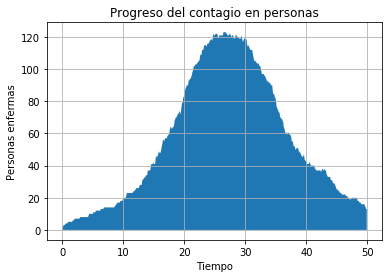

In [4]:
x, y, z, t =np.loadtxt('Data2.txt',unpack=True)
plt.fill_between(t,y)
plt.xlabel('Tiempo')
plt.ylabel('Personas enfermas')
plt.grid()
plt.title('Progreso del contagio en personas')
plt.show()

**3. MORE SOCIAL DISTANCING**

In [5]:
class poblacion:


  def __init__(self, x, y, vx, vy, r, S, E, C):

    # nombramos los estados de las personas
    
    self.sanos = S
    self.enfermos = E
    self.recuperados = C

    # sus posiciones
    
    self.X = x
    self.Y = y

    # sus velocidades
    self.VX = vx
    self.VY = vy

    # el radio 
    self.R = r

 #  definimos la evolución en su posicion
    
  def posicion(self, dt):
    
    self.X = self.X + self.VX*dt
    self.Y = self.Y + self.VY*dt

 # definimos las colisiones
    
  def colision(self,Vr,distance):
    
    
    choque = 2*self.R - distance     

    self.X = self.X + choque*Vr[0]

    self.Y = self.Y + choque*Vr[1]
    
    self.VX = uniform(-2,2)
    self.VY = random.choice([-1,1])*np.sqrt((2)**(2) - self.VX**(2))
    if self.VX == 0 and self.VY == 0:
        self.VX = self.VX
        self.VY = self.VY
        
    
    
     


  # definimos la colisión con las paredes
    
  def walls(self, w):

    
    if (w == 1):                          # difinimos una de las paredes, izquierda
      
      choque = -self.X + self.R          
      
      self.VX = self.VX - 2*self.VX       # cambio de la velocidad por el choque
      
      self.X = self.X + choque           # cambio de la posición por el choque
        

        
      
    if (w == 2):                          #derecha
      
      choque = l -self.X - self.R
      self.VX = self.VX - 2*self.VX
      self.X = self.X + choque
        
   
        
      
    if (w == 3):                          #arriba
      
      choque = l -self.Y - self.R
      self.VY = self.VY - 2*self.VY
      self.Y = self.Y + choque
    
   
          
    
    
    if (w == 4):                          #abajo
      
      choque = -self.Y + self.R
      self.VY = self.VY - 2*self.VY
      self.Y = self.Y + choque
      
 
    

  # definimos la función para enfermar a las personas
  
  def test_enfermedad(self):

    if (self.recuperados != True):
                
      self.enfermos = True
      self.sanos = False
      
  # definimos la función de cuarentena
  
  def test_recuperacion(self,cont):

    if (self.enfermos == True ):

      
      cont = cont + dt
      
      if (cont >= 15 ):
        
        self.recuperados = True
        self.enfermos = False

    return cont


# definimos condiciones iniciales

n = 200    # número de personas
dt = 0.1   # aumento temporal
l = np.sqrt(n) # tamaño de la caja  
r = 0.1        # radio
T = np.arange(0,50,dt)  # Tiempo 


personas= []                       # lista vacía para agregar a las personas


for i in range(n):

  vx = uniform(-2,2)         
  vy = random.choice([-1,1])*np.sqrt(2**(2) - vx**(2))
  #if (vx == 0 and vy == 0):
   # persona = poblacion(uniform(0,l),uniform(0,l), 0, 0, r, True, False, False) 
    #personas.append(persona)


  if (i == 0):                  # para una persona enferma

    persona = poblacion(uniform(0,l),uniform(0,l), vx, vy, r, False, True, False)
    personas.append(persona)
    
  else:

    persona = poblacion(uniform(0,l),uniform(0,l), vx, vy, r, True, False, False)
    personas.append(persona)
    
cont= np.zeros(n)

data = np.zeros((len(T),3))


# Simulación

for k in range(len(T)):     # Loop para el tiempo
  
  for i in range(n):          # para cada persona

    for j in range(n):        # para la interacción entre personas
        if (i%8 == 0):         #Condición para que una de cada 8 partículas se mueva
        
          if (i != j):
        
            VR = [personas[i].X - personas[j].X, personas[i].Y - personas[j].Y]
            distance = linalg.norm(VR)

            if distance <= (personas[i].R + personas[j].R ) :    # Colisión entre personas

              if (personas[i].enfermos == True):                    # Infección 

                personas[j].test_enfermedad()
            
              Vr = VR/(linalg.norm(VR))
          
              personas[i].colision(Vr,distance)

           
    if (personas[i].X  - personas[i].R <= 0   ):     # colisión con las paredes
  
      personas[i].walls(1)
  
    if (personas[i].X + personas[i].R >= l ):
  
      personas[i].walls(2)
  

    if (personas[i].Y + personas[i].R >= l ):
  
      personas[i].walls(3)
  

    if (personas[i].Y - personas[i].R <= 0 ):
  
      personas[i].walls(4)

        
    cont[i] = personas[i].test_recuperacion(cont[i])    # Conteo del tiempo que le toma a una persona recuperarse
      
    personas[i].posicion(dt)       #  cambio de posición

    # Datos
    
    if (personas[i].sanos == True):
      
      data[k,0] = data[k,0] +1
      
    elif (personas[i].enfermos == True):
      
      data[k,1] = data[k,1] +1
  

    elif (personas[i].recuperados == True):
      

      data[k,2] = data[k,2] +1



datos = np.column_stack((data, T))

np.savetxt("Data3.txt",datos, fmt='%s')

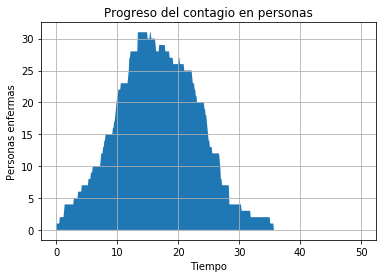

In [7]:
x, y, z, t =np.loadtxt('Data3.txt',unpack=True)
plt.fill_between(t,y)
plt.xlabel('Tiempo')
plt.ylabel('Personas enfermas')
plt.grid()
plt.title('Progreso del contagio en personas')
plt.show()